In [ ]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split, cross_validate, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pickle

Đọc dữ liệu và show thông tin

In [9]:
df = pd.read_csv("customer-v2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3217 entries, 0 to 3216
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   MAKHACHHANG                3217 non-null   int64 
 1   PHUONGXA                   3217 non-null   object
 2   QUANHUYEN                  3217 non-null   object
 3   LOAIDICHVU                 3217 non-null   object
 4   LOAIKHACHHANG              3217 non-null   int64 
 5   SODICHVU                   3217 non-null   int64 
 6   SOLANBAOHONG               3217 non-null   int64 
 7   SOLANGOIKIEMBAOHONG        3217 non-null   int64 
 8   SOLANBAOHONGHAILONG        3217 non-null   int64 
 9   SOLANBAOHONGKHONGHAILONG   3217 non-null   int64 
 10  KHAOSATLAPMOI              3217 non-null   int64 
 11  KHAOSATLAPMOIHAILONG       3217 non-null   int64 
 12  KHAOSATLAPMOIKHONGHAILONG  3217 non-null   int64 
 13  SOLANCHAMSOC               3217 non-null   int64 
 14  SOLANTAM

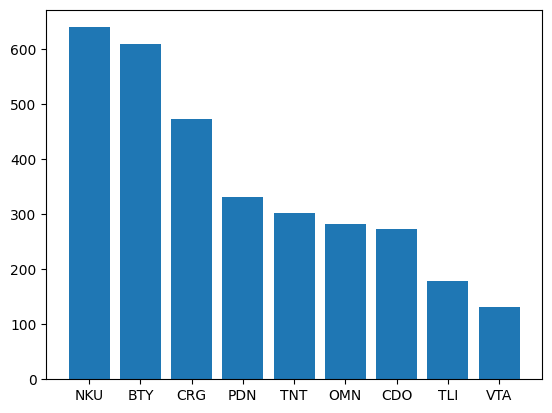

In [17]:
temp = df['QUANHUYEN'].value_counts()
plt.bar(temp.index, temp)
plt.show()

Show tỉ lệ nhãn

In [ ]:
label_value_count = df['THANHLY'].value_counts()
print(label_value_count[0], label_value_count[0]/3217*100)
print(label_value_count[1], label_value_count[1]/3217*100)

Loại bỏ các dòng thiếu dữ liệu

In [ ]:
df.dropna(inplace=True)
print(df.info())

Bỏ các cột không quan trọng

In [ ]:
df = df.drop(columns=['MAKHACHHANG', 'PHUONGXA', 'QUANHUYEN', 'LOAIKHACHHANG', 'HINHTHUCTHANHTOAN', 'DIEMTINNHIEM'])
df.info()

Xóa đi các dòng chứa dữ liệu không hợp lệ

In [ ]:
df = df[df['GIADICHVU'] > 0]
print(df.info())

Chuẩn hóa dữ liệu

In [ ]:
scaler = MinMaxScaler()
for feature in df.columns:
    if (df[feature].dtype == 'int64'):
        df[feature] = scaler.fit_transform(df[[feature]])

# Chia dataset và mã hóa

Chia tập dữ liệu

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Mã hóa tập X với One-hot

In [ ]:
for feature in X.columns:
    if (X[feature].dtype == 'object'):
        dummy = pd.get_dummies(X[feature], prefix=feature)
        X = pd.concat([X, dummy], axis=1)
        del X[feature]

Xây dựng model máy học và tính các chỉ số đánh giá

In [ ]:
classifier_algorithms = {
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(max_depth=4, random_state=0), 
    "Random Forest": RandomForestClassifier(n_estimators=10, random_state=0), 
    "Logistic Regression": LogisticRegression(random_state=0),
}
model = classifier_algorithms["Decision Tree"]
model.fit(np.array(X), y)
pickle.dump(model, open(f"Random Forest.pkl", 'wb'))
scoring = ("accuracy", "f1_micro", "recall_micro", "precision_micro")
k_fold = KFold(n_splits=10, random_state=0, shuffle=True)
scores = cross_validate(model, np.array(X), y, scoring=scoring, cv=k_fold)
print('test_accuracy', sum(scores['test_accuracy']) / len(scores['test_accuracy']))
print('test_f1', sum(scores['test_f1_micro']) / len(scores['test_f1_micro']))
print('recall', sum(scores['test_recall_micro']) / len(scores['test_recall_micro']))
print('precision', sum(scores['test_precision_micro']) / len(scores['test_precision_micro']))

In [ ]:
temp = df.sample(n = 10)
print(temp)
temp.to_csv("example.csv")

In [ ]:
# model = pickle.load(open("Random Forest.pkl", "rb"))
test = pd.read_csv("example.csv")
print(test.columns)
scaler = MinMaxScaler()
for feature in test.columns:
    if (test[feature].dtype == 'int64'):
        test[feature] = scaler.fit_transform(test[[feature]])
for feature in test.columns:
    if (test[feature].dtype == 'object'):
        dummy = pd.get_dummies(test[feature], prefix=feature)
        test = pd.concat([test, dummy], axis=1)
        del test[feature]
model.predict(test)

In [ ]:
 #InvalidParameterError: The 'scoring' parameter of check_scoring must be a str among {'precision', 'f1_macro', 'rand_score', 'jaccard_weighted', 'precision_macro', 'adjusted_rand_score', 'f1', 'adjusted_mutual_info_score', 'average_precision', 'r2', 'completeness_score', 'precision_samples', 'positive_likelihood_ratio', 'roc_auc_ovr_weighted', 'recall', 'f1_micro', 'precision_weighted', 'roc_auc_ovo_weighted', 'jaccard_samples', 'mutual_info_score', 'explained_variance', 'jaccard', 'homogeneity_score', 'neg_mean_gamma_deviance', 'neg_root_mean_squared_error', 'recall_macro', 'recall_micro', 'recall_samples', 'f1_samples', 'jaccard_macro', 'neg_brier_score', 'neg_negative_likelihood_ratio', 'neg_mean_absolute_error', 'precision_micro', 'roc_auc', 'fowlkes_mallows_score', 'accuracy', 'f1_weighted', 'neg_log_loss', 'recall_weighted', 'neg_mean_absolute_percentage_error', 'max_error', 'roc_auc_ovr', 'roc_auc_ovo', 'neg_mean_poisson_deviance', 'balanced_accuracy', 'matthews_corrcoef', 'top_k_accuracy', 'neg_median_absolute_error', 'neg_mean_squared_error', 'jaccard_micro', 'normalized_mutual_info_score', 'v_measure_score', 'neg_mean_squared_log_error'}, a callable or None. Got ['accuracy_score', 'f1_score'] instead.